In [1]:
import janitor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
credito = pd.read_csv('credito.csv').clean_names()

In [3]:
credito.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [4]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
card           1319 non-null object
reports        1319 non-null int64
age            1319 non-null float64
income         1319 non-null float64
share          1319 non-null float64
expenditure    1319 non-null float64
owner          1319 non-null object
selfemp        1319 non-null object
dependents     1319 non-null int64
months         1319 non-null int64
majorcards     1319 non-null int64
active         1319 non-null int64
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [5]:
credito.corr()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
reports,1.000000,0.044089,0.011023,-0.159011,-0.136538,0.019731,0.048968,-0.007304,0.207755
age,0.044089,1.000000,0.324653,-0.115697,0.014948,0.212146,0.436426,0.009777,0.181070
income,0.011023,0.324653,1.000000,-0.054429,0.281104,0.317601,0.130346,0.107138,0.180540
share,-0.159011,-0.115697,-0.054429,1.000000,0.838779,-0.082618,-0.055348,0.051470,-0.023474
expenditure,-0.136538,0.014948,0.281104,0.838779,1.000000,0.052664,-0.029007,0.077514,0.054724
dependents,0.019731,0.212146,0.317601,-0.082618,0.052664,1.000000,0.046512,0.010285,0.107133
months,0.048968,0.436426,0.130346,-0.055348,-0.029007,0.046512,1.000000,-0.041447,0.100028
majorcards,-0.007304,0.009777,0.107138,0.051470,0.077514,0.010285,-0.041447,1.000000,0.119603
active,0.207755,0.181070,0.180540,-0.023474,0.054724,0.107133,0.100028,0.119603,1.000000


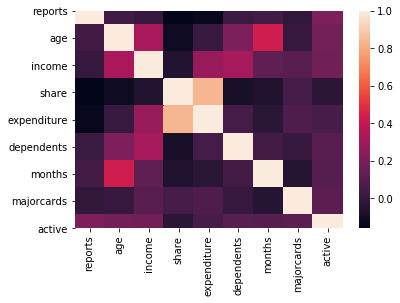

In [6]:
sns.heatmap(credito.corr())

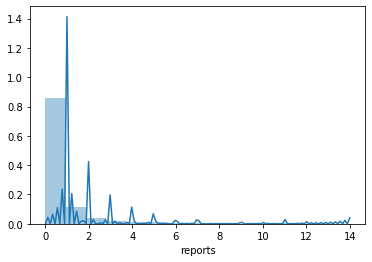

In [7]:
sns.distplot(credito['reports'], bins=15)

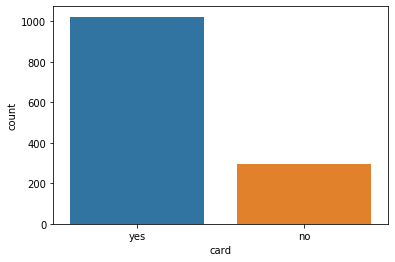

In [8]:
sns.countplot(credito['card'])

In [9]:
credito['card'].value_counts()

yes    1023
no      296
Name: card, dtype: int64

In [10]:
credito['owner'].value_counts()

no     738
yes    581
Name: owner, dtype: int64

In [11]:
credito['selfemp'].value_counts()

no     1228
yes      91
Name: selfemp, dtype: int64

In [12]:
credito = pd.get_dummies(credito, columns=['card', 'owner', 'selfemp'], drop_first=True)

In [13]:
credito.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0


In [14]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
reports        1319 non-null int64
age            1319 non-null float64
income         1319 non-null float64
share          1319 non-null float64
expenditure    1319 non-null float64
dependents     1319 non-null int64
months         1319 non-null int64
majorcards     1319 non-null int64
active         1319 non-null int64
card_yes       1319 non-null uint8
owner_yes      1319 non-null uint8
selfemp_yes    1319 non-null uint8
dtypes: float64(4), int64(5), uint8(3)
memory usage: 96.7 KB


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,  confusion_matrix

In [16]:
X_train, X_test, y_train, y_test = train_test_split(credito.drop('card_yes', axis=1), credito['card_yes'],
                                                   test_size=0.3, random_state=1, stratify=credito['card_yes'])

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((923, 11), (396, 11), (923,), (396,))

In [18]:
lm = LogisticRegression()

In [19]:
lm.fit(X_train, y_train)

C:\Users\cyro_\Anaconda3Novo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
lm.score(X_train, y_train)

0.9826652221018418

In [21]:
lm.coef_, lm.intercept_

(array([[-1.31384616e+00, -1.09449956e-02, -4.72103998e-01,
         -1.55708148e-04,  1.50682977e+00, -6.75181570e-01,
         -3.48932306e-03,  4.96909421e-01,  6.79852466e-02,
          3.73358712e-01,  3.32181780e-01]]), array([-0.61392195]))

In [22]:
y_pred = lm.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        89
           1       1.00      0.97      0.99       307

   micro avg       0.98      0.98      0.98       396
   macro avg       0.96      0.99      0.97       396
weighted avg       0.98      0.98      0.98       396



In [24]:
print(confusion_matrix(y_test, y_pred))

[[ 89   0]
 [  8 299]]
